# Linear Regression Single Variable

In [2]:
import pandas as pd 

In [3]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn import linear_model

In [7]:
home_price = {
    'area': [2600, 3000, 3200, 3600, 4000],
    'price': [550000, 565000, 610000, 680000, 725000]
}

In [8]:
type(home_price)

dict

In [9]:
df = pd.DataFrame.from_dict(home_price)

In [10]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


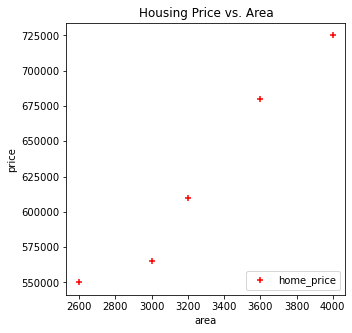

In [81]:
%matplotlib inline

plt.figure(figsize=(5, 5))
plt.scatter(df['area'],
            df['price'],
            label='home_price',
            color='red',
            marker='+')
plt.xlabel('area')
plt.ylabel('price')

plt.title('Housing Price vs. Area')
plt.legend(loc=4)
plt.show()

In [13]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df['price'] )

LinearRegression()

In [67]:
reg.predict([[3300]])

array([628715.75342466])

In [68]:
m = reg.coef_

In [69]:
b = reg.intercept_

In [70]:
y = m * 3300 + b

print (y)

[628715.75342466]


In [71]:
area = np.array([
    1000, 1500, 2300, 3540, 4120, 4560, 5490, 3460, 4750, 2300, 9000, 8600,
    7100
]).reshape(-1, 1)

In [72]:
area.shape

(13, 1)

In [73]:
p = reg.predict(area)

In [74]:
df_predict_index = np.arange(0,13).tolist()
print(df_predict_index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [75]:
df_predict = pd.DataFrame(data=area, index= df_predict_index, columns=['area'] )

In [76]:
df_predict.head(3)

,area
0,1000
1,1500
2,2300


In [79]:
df_predict['predicted_price'] = p
df_predict

,area,predicted_price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [80]:
df_predict.to_csv('prediction.csv', index = False)

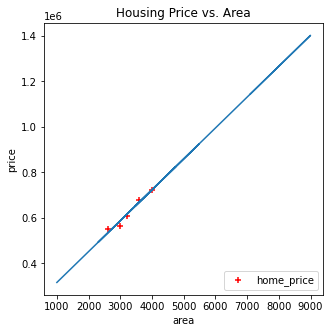

In [82]:
%matplotlib inline

plt.figure(figsize=(5,5))
plt.scatter(df['area'], df['price'], label='home_price', color='red',marker='+')
plt.plot (df_predict['area'], df_predict['predicted_price'])
plt.xlabel('area')
plt.ylabel('price')

plt.title('Housing Price vs. Area')
plt.legend(loc=4)
plt.show()

## Exercise 

Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020

In [83]:
income_df = pd.read_csv('D:/GitHub/py/ML/1_linear_reg/Exercise/canada_per_capita_income.csv')

In [84]:
income_df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [85]:
income_df.columns

Index(['year', 'per capita income (US$)'], dtype='object')

In [96]:
income_df=income_df.rename(columns={'per capita income (US$)': 'income'})

In [97]:
income_df.describe()

,year,income
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [98]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    47 non-null     int64  
 1   income  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [99]:
income_df.shape

(47, 2)

In [100]:
reg = linear_model.LinearRegression()
reg.fit(income_df[['year']], income_df[['income']])

LinearRegression()

In [101]:
reg.coef_

array([[828.46507522]])

In [102]:
reg.intercept_

array([-1632210.75785546])

In [108]:
print('Canada\'s per capita income in year 2020: {}'.format(reg.predict([[2020]])))

Canada's per capita income in year 2020: [[41288.69409442]]
